In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/Users/sociolla/Shaurya/Desktop/Walmart_Sales/train.csv')
features = pd.read_csv('/Users/sociolla/Shaurya/Desktop/Walmart_Sales/features.csv')
stores = pd.read_csv('/Users/sociolla/Shaurya/Desktop/Walmart_Sales/stores.csv')
test = pd.read_csv('/Users/sociolla/Shaurya/Desktop/Walmart_Sales/test.csv')

In [4]:
def info(dataset):
    print(dataset.info())
def isnull(dataset):
    return dataset.isnull().sum()

In [5]:
info(train)
info(test)
info(features)
info(stores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (tot

In [6]:
Train=train.merge(features,how='inner',on=['Store','Date','IsHoliday']).reset_index(drop=True)
Train_data = Train.merge(stores, how='inner',on='Store').reset_index(drop=True)

Test=test.merge(features,how='inner',on=['Store','Date','IsHoliday']).reset_index(drop=True)
Test_data = Test.merge(stores, how='inner',on='Store').reset_index(drop=True)

In [7]:
info(Train_data)
info(Test_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB
None
<class 'pandas.core

In [8]:
isnull(Train_data)

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [9]:
isnull(Test_data)

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [10]:
Train_data['MarkDown1'] = Train_data['MarkDown1'].fillna(0)
Train_data['MarkDown2'] = Train_data['MarkDown2'].fillna(0)
Train_data['MarkDown3'] = Train_data['MarkDown3'].fillna(0)
Train_data['MarkDown4'] = Train_data['MarkDown4'].fillna(0)
Train_data['MarkDown5'] = Train_data['MarkDown5'].fillna(0)

In [11]:
Train_data.head(20)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [12]:
Test_data['MarkDown1'] = Test_data['MarkDown1'].fillna(0)
Test_data['MarkDown2'] = Test_data['MarkDown2'].fillna(0)
Test_data['MarkDown3'] = Test_data['MarkDown3'].fillna(0)
Test_data['MarkDown4'] = Test_data['MarkDown4'].fillna(0)
Test_data['MarkDown5'] = Test_data['MarkDown5'].fillna(0)
Test_data['CPI'] = Test_data['CPI'].fillna(Test_data['CPI'].mean())
Test_data['Unemployment'] = Test_data['Unemployment'].fillna(Test_data['Unemployment'].mean())

#Exploratory Data Analysis

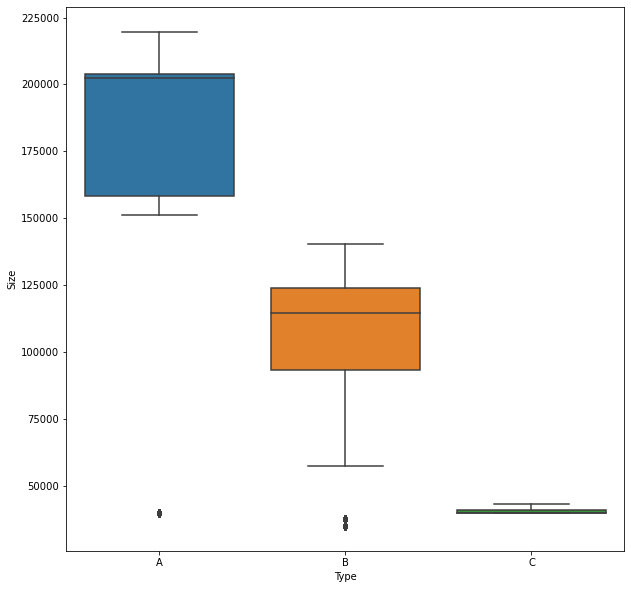

In [13]:
plt.figure(figsize=(10,10))
fig = sns.boxplot(data = Train_data, x='Type',y='Size')

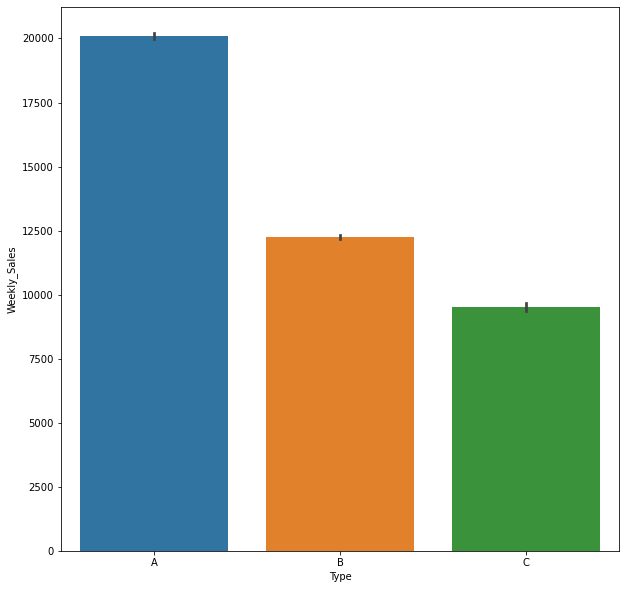

In [14]:
plt.figure(figsize=(10,10))
fig = sns.barplot(data = Train_data, x='Type',y='Weekly_Sales')

From Above we can see that size of store is directly proportional to the weekly sales of the store, More the size the more is the sales.

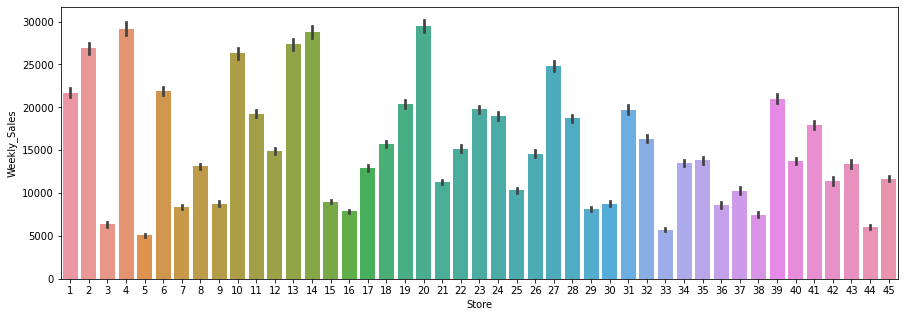

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(Train_data['Store'],Train_data['Weekly_Sales'])

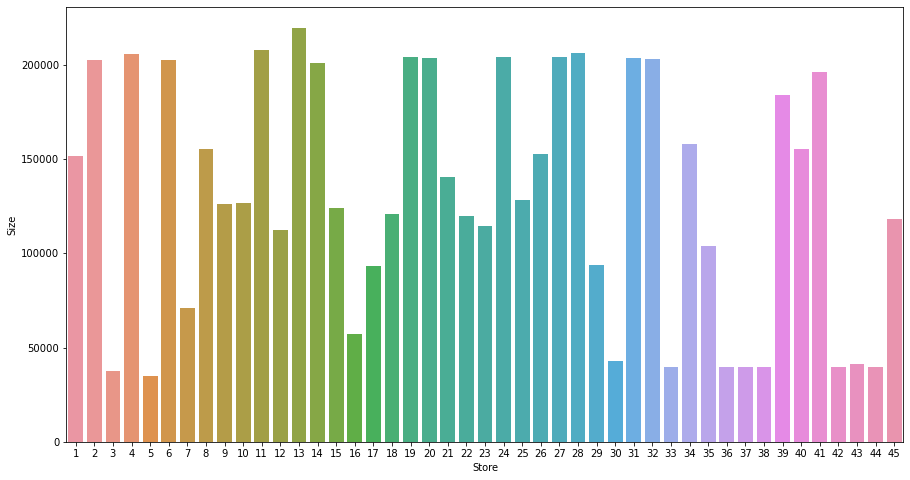

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(Train_data['Store'],Train_data['Size'])

We can see in the above analysis as well that the store with bigger size records more weekly sales.

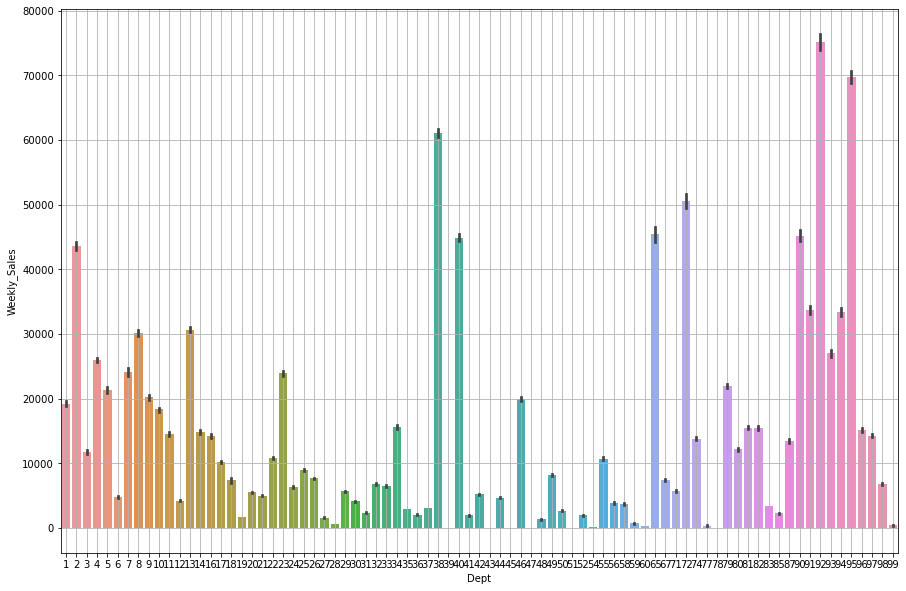

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(Train_data['Dept'],Train_data['Weekly_Sales'])
plt.grid()

From the above we are sure that all the Walmart Stores and Department recorded the sales for years 2010-2012

In [18]:
Train_data['Date'] = pd.to_datetime(Train_data['Date'], errors='coerce')
Train_data['Year'] = Train_data['Date'].dt.year
Train_data['Month'] = Train_data['Date'].dt.month
Train_data['Week'] = Train_data['Date'].dt.week
Train_data['Day_Name'] = Train_data['Date'].dt.weekday
Train_data['Day'] = Train_data['Date'].dt.day

In [19]:
Train_data['Season'] = Train_data['Month']

In [20]:
for x in range(len(Train_data['Month'])):
    if Train_data['Month'][x] in range(3,6):
        Train_data['Season'] == 2
    elif Train_data['Month'][x] in range(6,9):
        Train_data['Season'] == 3
    elif Train_data['Month'][x] in range(9,12):
        Train_data['Season'] == 4
    elif Train_data['Month'][x] in range(12,3):
        Train_data['Season'] == 1

In [21]:
def scatplot(dataset,col):
    plt.figure(figsize=(7,5))
    sns.scatterplot(dataset[col],dataset['Weekly_Sales'])
    plt.xlabel(col)
    plt.ylabel('Weekly_Sales')

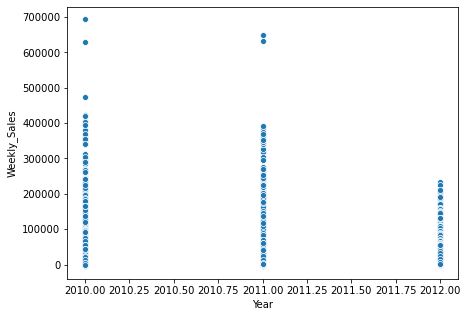

In [22]:
scatplot(Train_data,'Year')

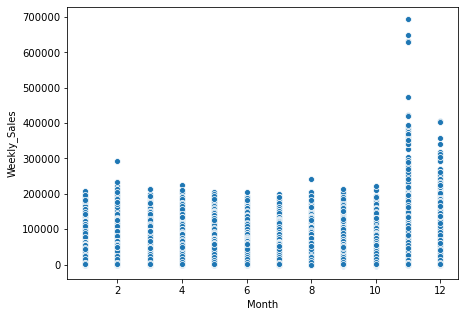

In [23]:
scatplot(Train_data,'Month')

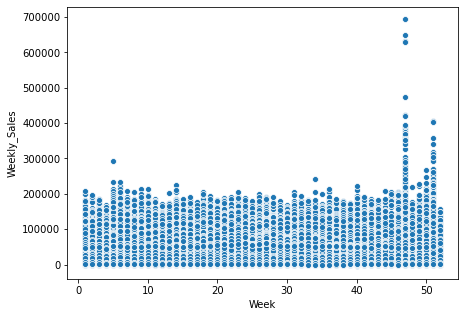

In [24]:
scatplot(Train_data,'Week')

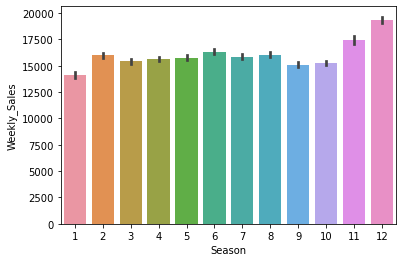

In [25]:
fig = sns.barplot(Train_data['Season'],Train_data['Weekly_Sales'])

Text(0, 0.5, 'Weekly Sales')

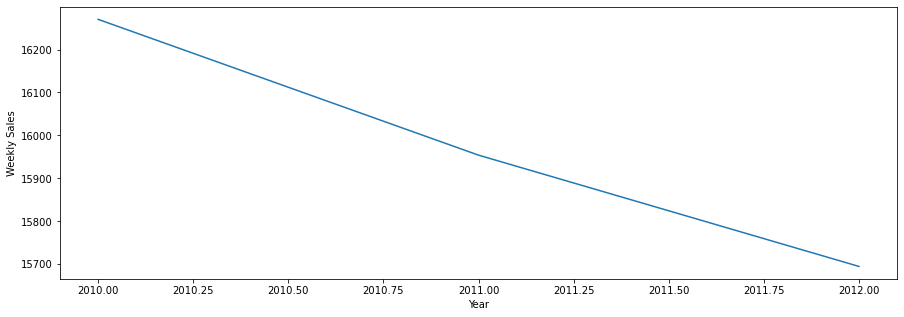

In [26]:
Year_sales = Train_data['Weekly_Sales'].groupby(Train_data['Year']).mean()
plt.figure(figsize=(15,5))
sns.lineplot(Year_sales.index,Year_sales.values)
plt.ylabel('Weekly Sales')

Text(0, 0.5, 'Weekly Sales')

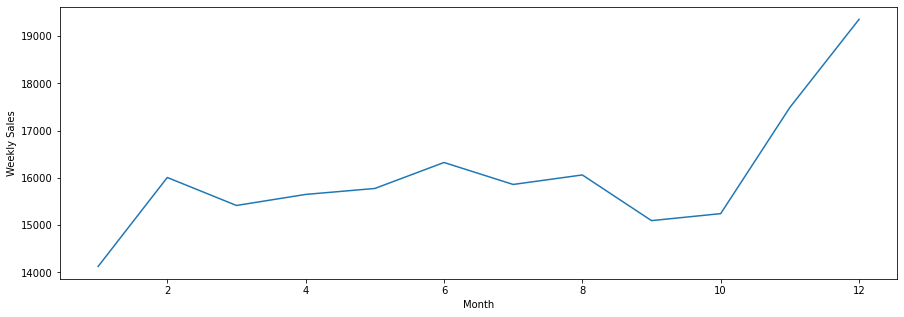

In [27]:
Month_sales = Train_data['Weekly_Sales'].groupby(Train_data['Month']).mean()
plt.figure(figsize=(15,5))
sns.lineplot(Month_sales.index,Month_sales.values)
plt.ylabel('Weekly Sales')

Text(0, 0.5, 'Weekly Sales')

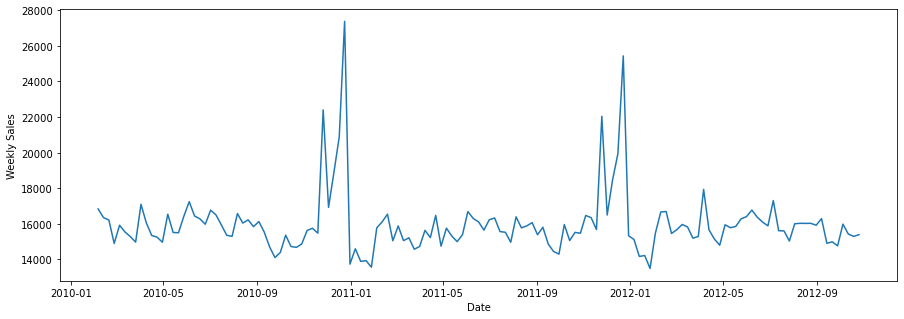

In [28]:
Date_sales = Train_data['Weekly_Sales'].groupby(Train_data['Date']).mean()
plt.figure(figsize=(15,5))
sns.lineplot(Date_sales.index,Date_sales.values)
plt.ylabel('Weekly Sales')

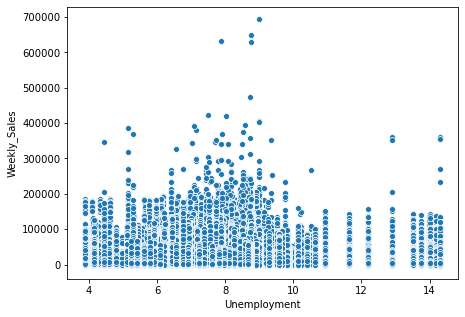

In [29]:
scatplot(Train_data,'Unemployment')

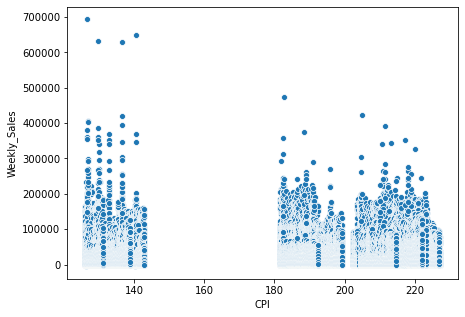

In [30]:
scatplot(Train_data,'CPI')

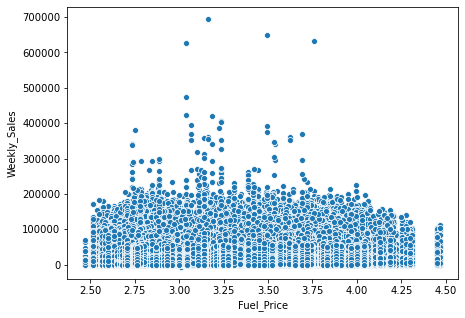

In [31]:
scatplot(Train_data,'Fuel_Price')

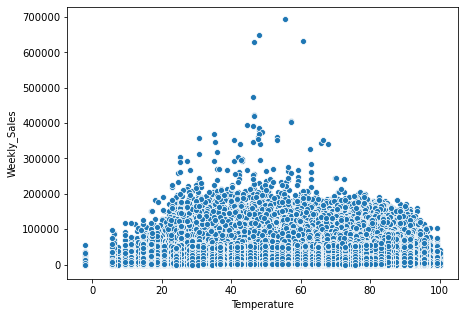

In [32]:
scatplot(Train_data,'Temperature')

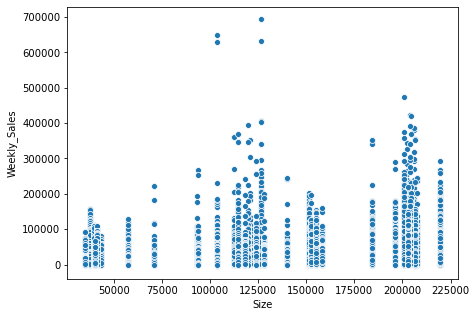

In [33]:
scatplot(Train_data,'Size')

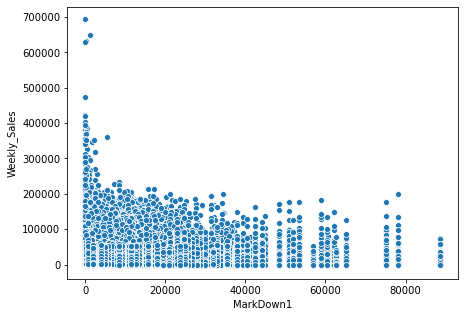

In [34]:
scatplot(Train_data,'MarkDown1')

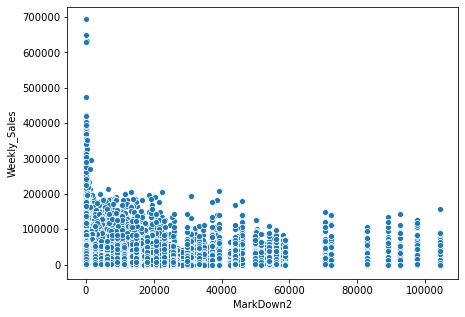

In [35]:
scatplot(Train_data,'MarkDown2')

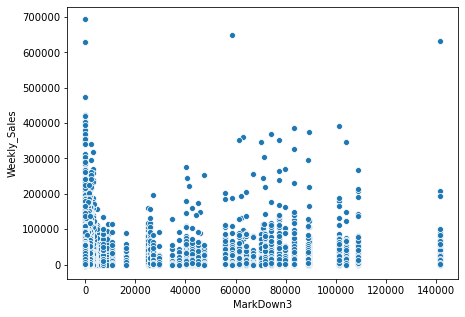

In [36]:
scatplot(Train_data,'MarkDown3')

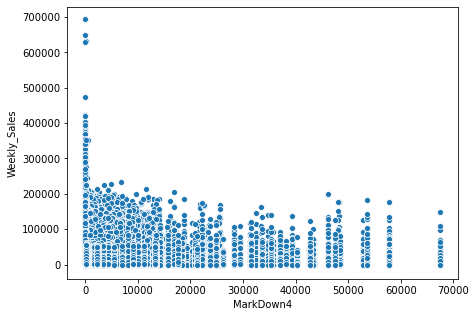

In [37]:
scatplot(Train_data,'MarkDown4')

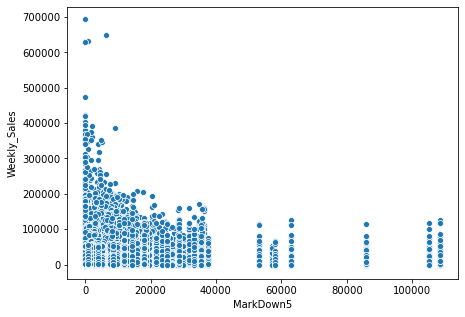

In [38]:
scatplot(Train_data,'MarkDown5')

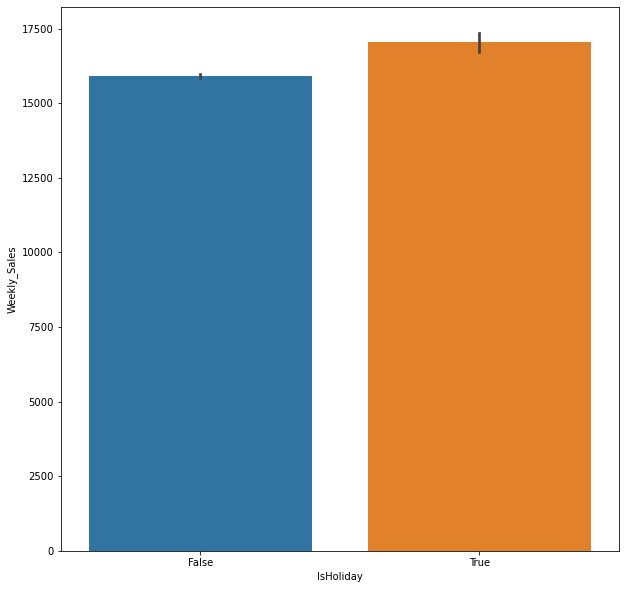

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(Train_data['IsHoliday'],Train_data['Weekly_Sales'])

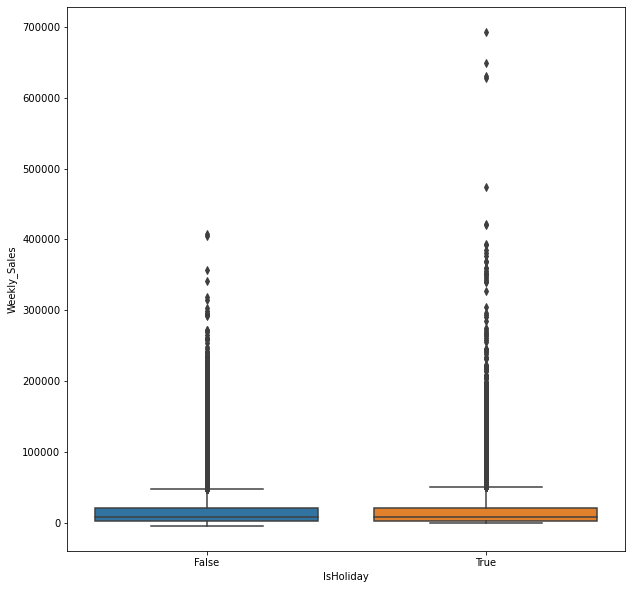

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(Train_data['IsHoliday'],Train_data['Weekly_Sales'])

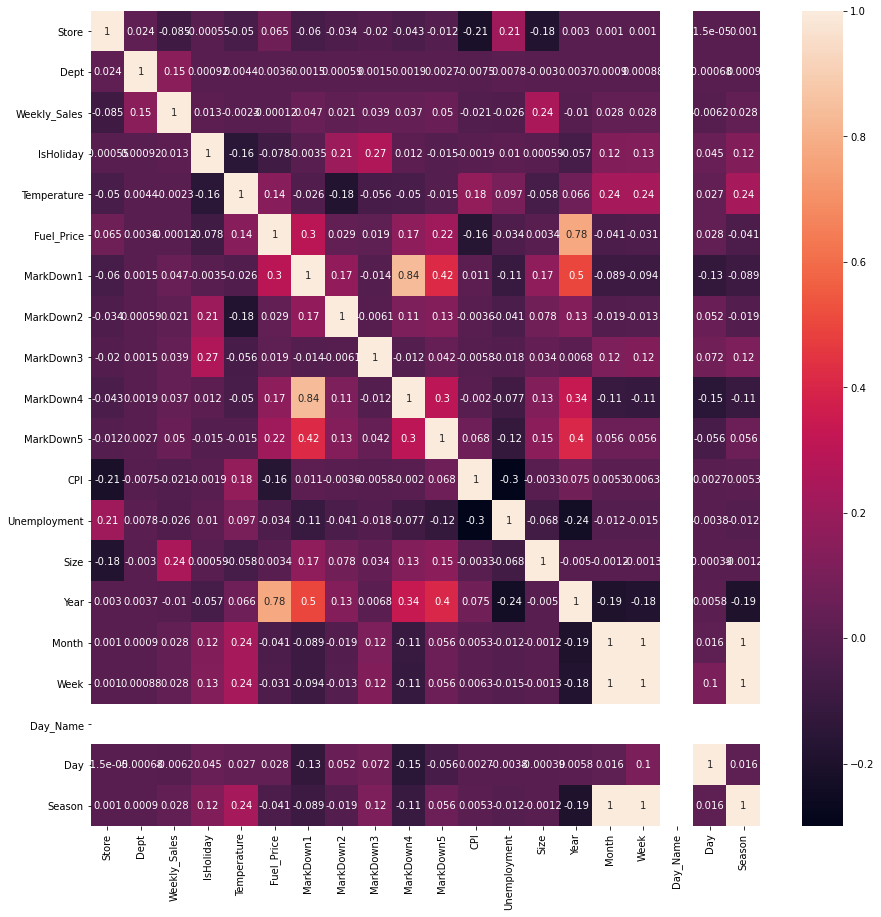

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(Train_data.corr(),annot=True)

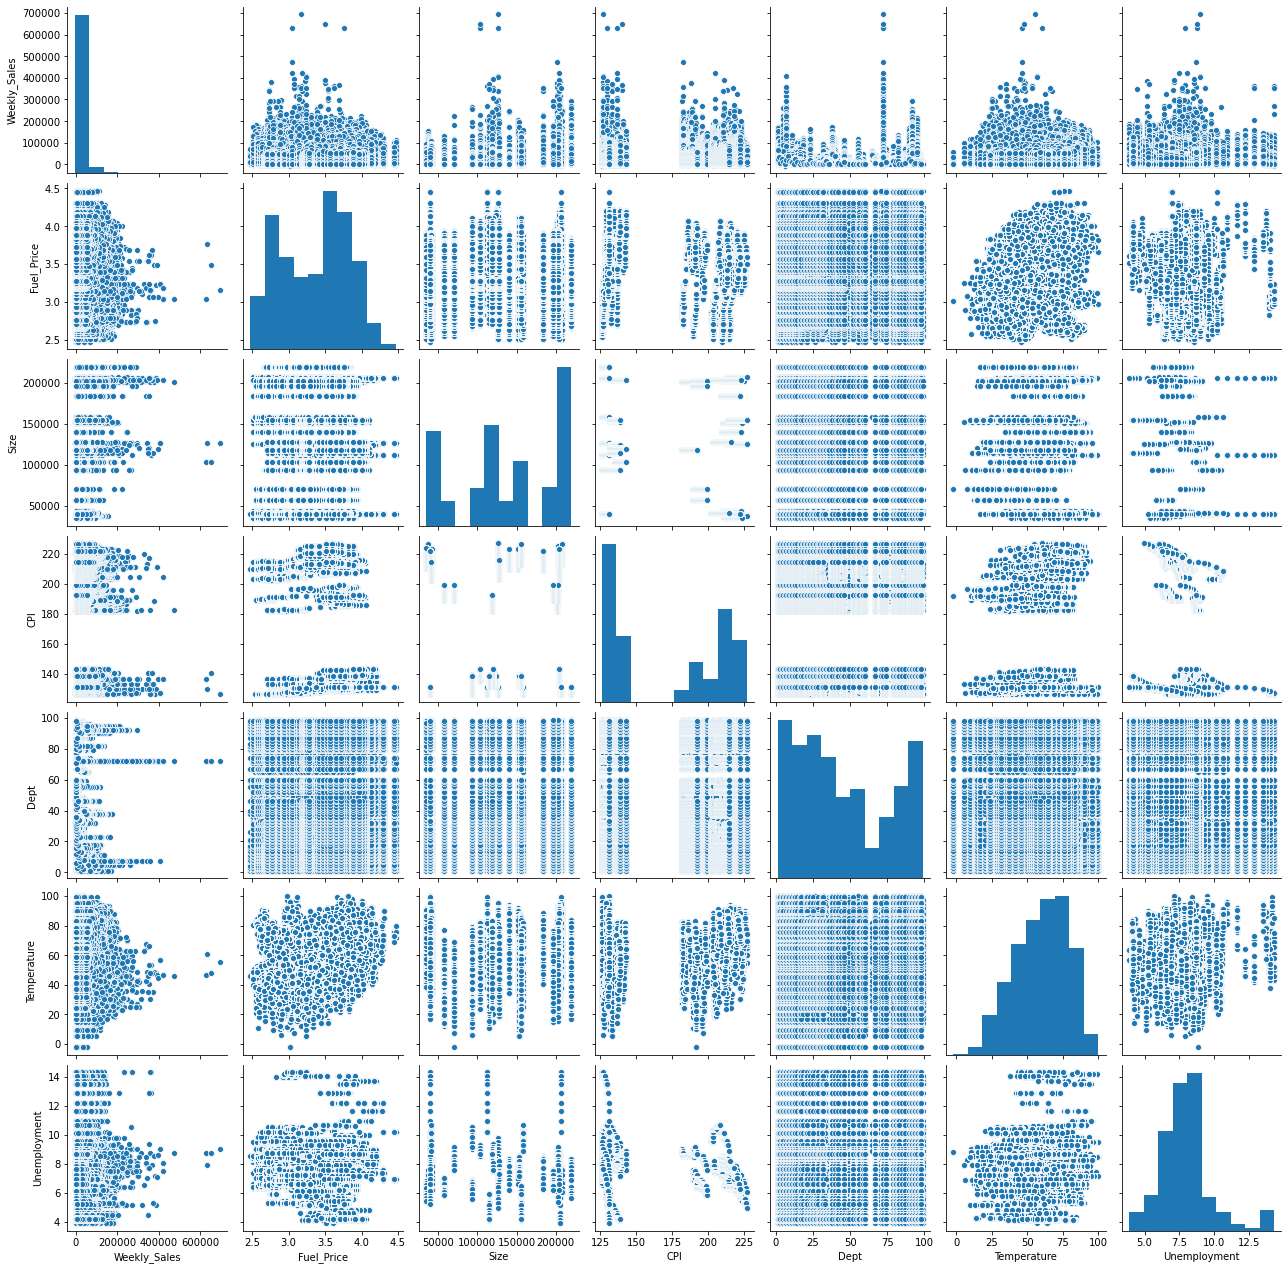

In [42]:
fig = sns.pairplot(Train_data, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

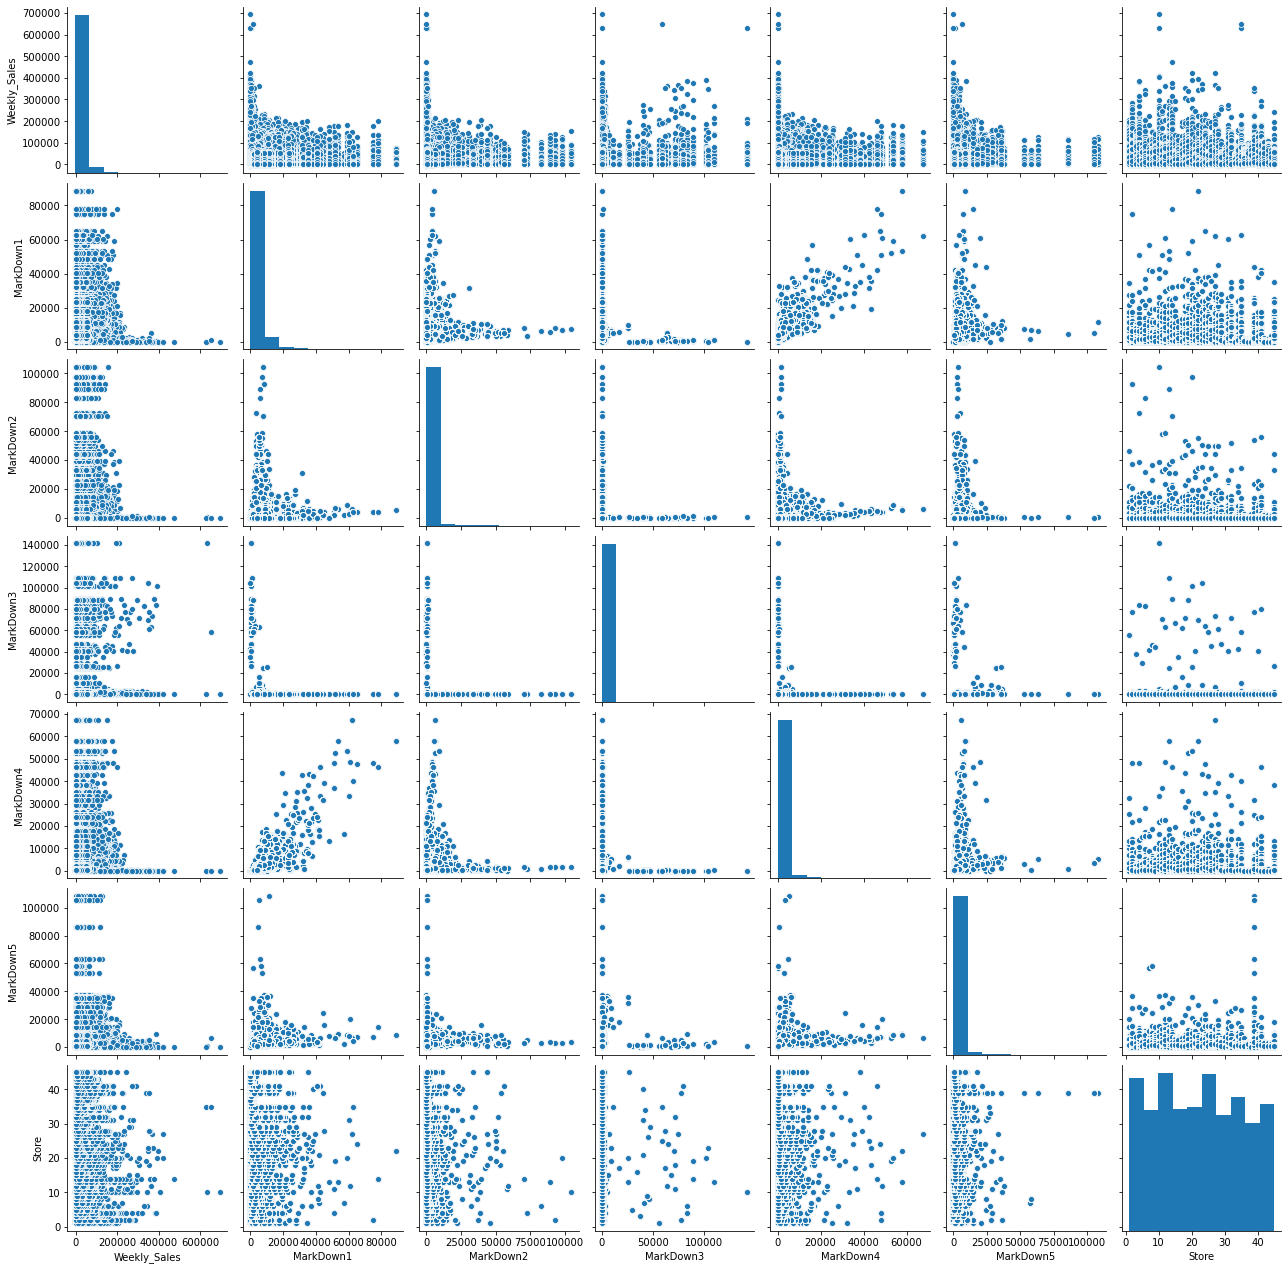

In [43]:
fig = sns.pairplot(Train_data, vars=['Weekly_Sales', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Store'])

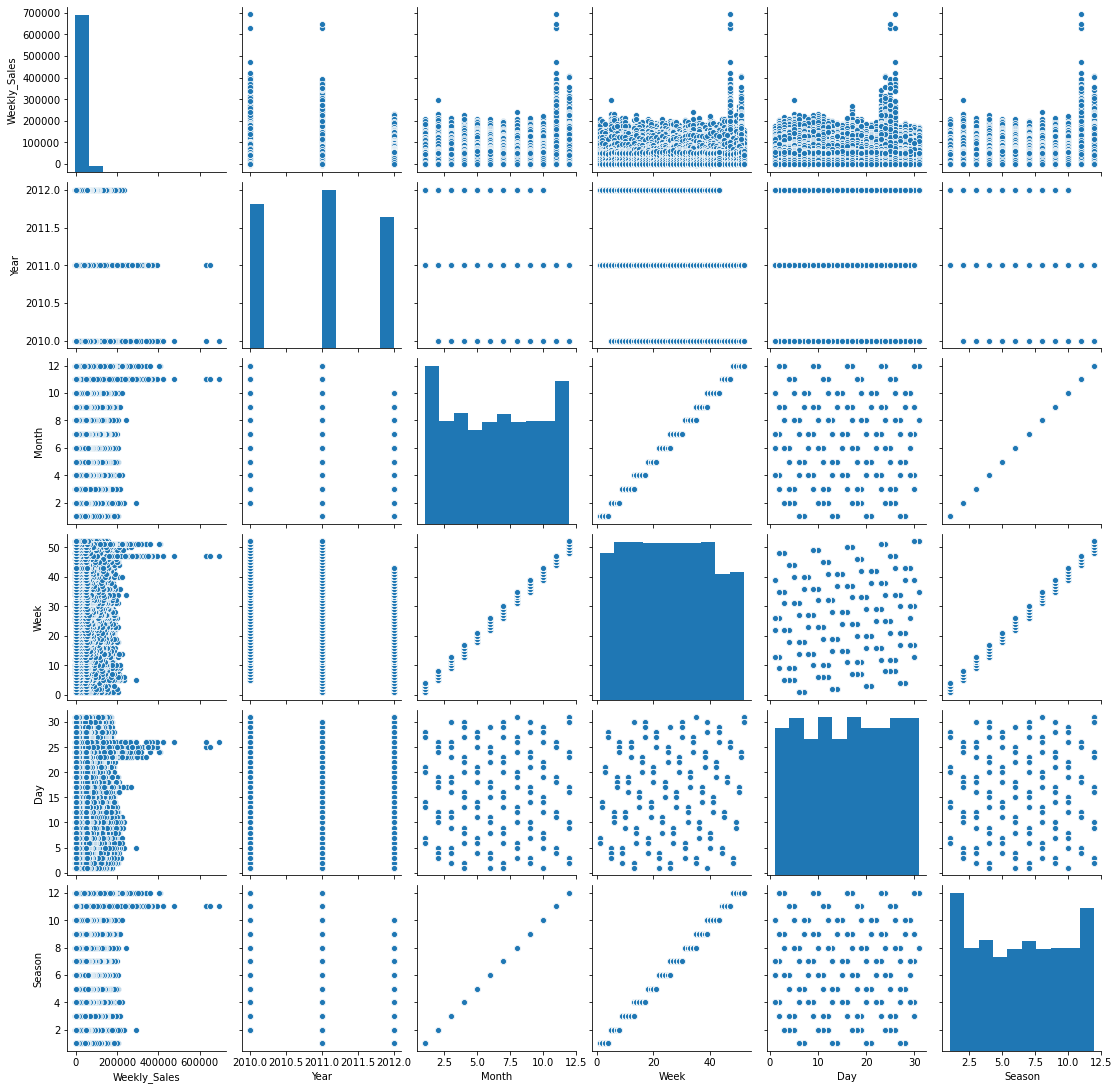

In [44]:
fig = sns.pairplot(Train_data, vars=['Weekly_Sales','Year','Month','Week','Day','Season'])

    Feature Engineering

In [45]:
Train_data = pd.get_dummies(Train_data)

In [46]:
Train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Year', 'Month', 'Week',
       'Day_Name', 'Day', 'Season', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [47]:
Train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Year,Month,Week,Day_Name,Day,Season,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,151315,2010,2,5,4,5,2,1,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,151315,2010,2,5,4,5,2,1,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,151315,2010,2,5,4,5,2,1,0,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,151315,2010,2,5,4,5,2,1,0,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,151315,2010,2,5,4,5,2,1,0,0


In [48]:
Train_data = Train_data.drop(columns=['Unemployment','Date','Fuel_Price','Day_Name','Week','Season','MarkDown1','CPI'])

Machine Learning Model

In [49]:
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [50]:
X = Train_data.drop(columns=['Weekly_Sales'])
y= Train_data['Weekly_Sales']

In [55]:
#pip install xgboost

In [56]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [58]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(WMAE(X_test,y_test,y_pred))

7295.0


In [61]:
#xgb = xgb.XGBRegressor()
#xgb.fit(X_train,y_train)
#y_pred = xgb.predict(X_test)
#print(WMAE(X_test,y_test,y_pred))

In [64]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(WMAE(X_test,y_test,y_pred))

1629.97


In [65]:
#def rf_try(n_estimators, max_depth,max_features,min_samples_leaf,min_samples_split,criterion='mae'):
 #   for a in max_depth:
  #      for b in max_features:
   #         for c in min_samples_split:
    #            for d in min_samples_leaf:
     #               rf = RandomForestRegressor(n_estimators=n_estimators,max_features=b,max_depth=a,min_samples_leaf=d,min_samples_split=c)
      #              rf.fit(X_train,y_train)
       #             y_pred = rf.predict(X_test)
        #            print('max_features=',b,'max_depth=',a,'min_samples_split',c,'min_samples_leaf',d,'WMAE',WMAE(X_test,y_test,y_pred))
                    

In [66]:
Test_data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [67]:
Test_data['Date'] = pd.to_datetime(Test_data['Date'], errors='coerce')
Test_data['Year'] = Test_data['Date'].dt.year
Test_data['Month'] = Test_data['Date'].dt.month
Test_data['Day'] = Test_data['Date'].dt.day

In [68]:
Test_data = pd.get_dummies(Test_data)

In [69]:
Test_data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Day,Type_A,Type_B,Type_C
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,2012,11,2,1,0,0
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,2012,11,2,1,0,0
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,2012,11,2,1,0,0
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,2012,11,2,1,0,0
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,2012,11,2,1,0,0


In [70]:
Submission = Test_data

In [71]:
Test_data = Test_data.drop(columns=['Date','Fuel_Price','MarkDown1','CPI','Unemployment'])

In [72]:
Test_data.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'Size', 'Year', 'Month', 'Day', 'Type_A',
       'Type_B', 'Type_C'],
      dtype='object')

In [73]:
Train_data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size', 'Year',
       'Month', 'Day', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [74]:
predicted_test = rf.predict(Test_data)

In [75]:
Submission['Weekly_Sales'] = predicted_test
Submission['Id'] = Submission['Store'].astype(str) + '_' +  Submission['Dept'].astype(str) + '_' +  Submission['Date'].astype(str)
Submission = Submission[['Id', 'Weekly_Sales']]

In [76]:
Submission.to_csv('Submission_walmart.csv', index=False)